In [226]:
# Import librarys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


DATA Processing

In [227]:
# Load data and display dataframe shape
online_shop_data = f'C:\\Users\\Saigo\\Desktop\\ISDS_Project\\online_shoppers_intention.csv'
online_shop_data = pd.read_csv('/content/online_shoppers_intention.csv')

print(f'rows:    {online_shop_data.shape[0]}')
print(f'columns: {online_shop_data.shape[1]}')

rows:    12330
columns: 18


In [228]:
online_shop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [229]:
online_shop_data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [230]:
# STEP 1: Check for missing value amounts and Percentages

# Count missing values per column
missing_values = online_shop_data.isna().sum()

# Calculate the percentage of missing values
total_rows = online_shop_data.shape[0]
percentage_missing = (missing_values / total_rows) * 100

# Create a new DataFrame to display the count and percentage
missing_info = pd.DataFrame({'Count': missing_values, 'Percentage': percentage_missing})

print(missing_info)

                         Count  Percentage
Administrative               0         0.0
Administrative_Duration      0         0.0
Informational                0         0.0
Informational_Duration       0         0.0
ProductRelated               0         0.0
ProductRelated_Duration      0         0.0
BounceRates                  0         0.0
ExitRates                    0         0.0
PageValues                   0         0.0
SpecialDay                   0         0.0
Month                        0         0.0
OperatingSystems             0         0.0
Browser                      0         0.0
Region                       0         0.0
TrafficType                  0         0.0
VisitorType                  0         0.0
Weekend                      0         0.0
Revenue                      0         0.0


<ipython-input-231-16d986fdad80>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = online_shop_data.corr()


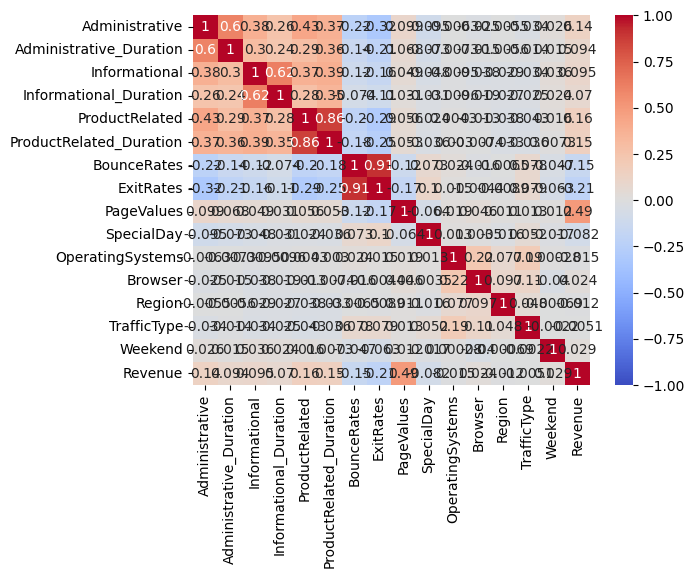

In [231]:
# Create a heatmap of the correlation matrix
correlation_matrix = online_shop_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [232]:
# Check if any correlation values are less than -0.8 or greater than 0.8
high_correlations = (correlation_matrix < -0.8) | (correlation_matrix > 0.8) & (correlation_matrix != 1)

# Filter and display the high correlation values
high_correlation_values = correlation_matrix[high_correlations]
high_correlation_values = high_correlation_values.dropna(how='all')
high_correlation_values = high_correlation_values.dropna(axis = 1,how='all')
high_correlation_values

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
ProductRelated,NaN,0.860927,NaN,NaN
ProductRelated_Duration,0.860927,NaN,NaN,NaN
BounceRates,NaN,NaN,NaN,0.913004
ExitRates,NaN,NaN,0.913004,NaN


In [233]:
#Drop ProductRelated in favor of Duration, (Time spent on page),Drop ExitRates
#The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce")
#without triggering any other requests to the analytics server during that session.
drop_col = ['ProductRelated','ExitRates']
online_shop_data.drop(columns=drop_col,inplace=True)

Check for Outliers

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


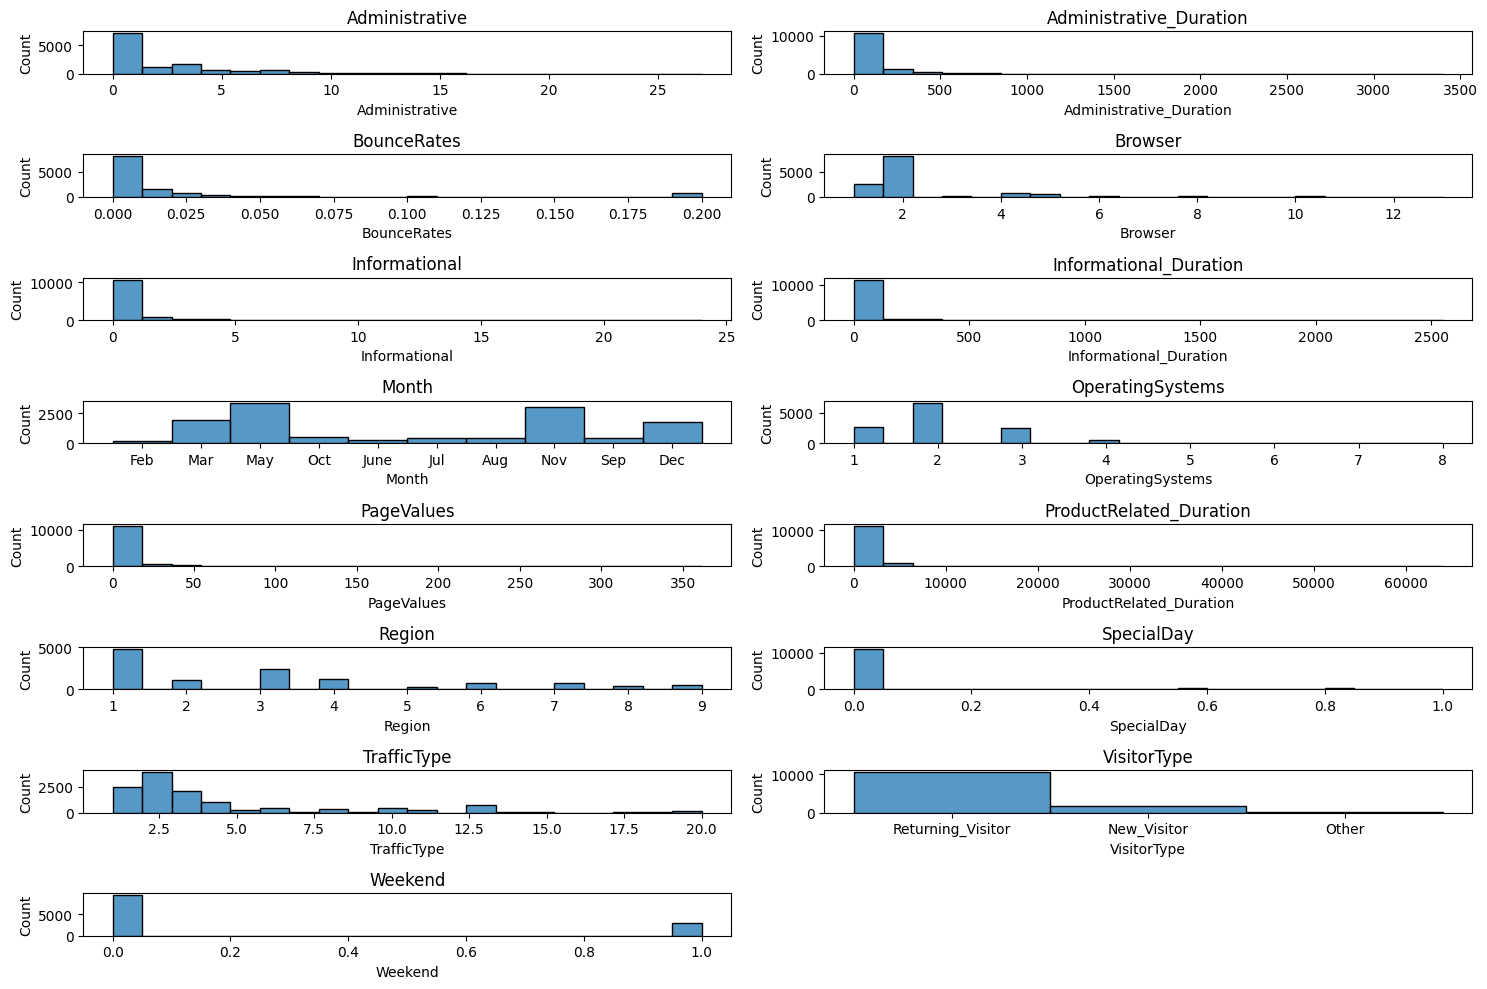

In [234]:
# Assuming online_shop_data is your DataFrame
columns_to_plot = online_shop_data.columns.difference(['Revenue'])

# Determine the number of rows and columns for subplots dynamically
num_cols = 2
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each column and plot a histogram using seaborn
for i, column in enumerate(columns_to_plot):
    sns.histplot(online_shop_data[column], bins=20, ax=axes[i])
    axes[i].set_title(column)

# Hide any remaining empty subplots
for j in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Lower bound: -6.0
Upper bound: 10.0


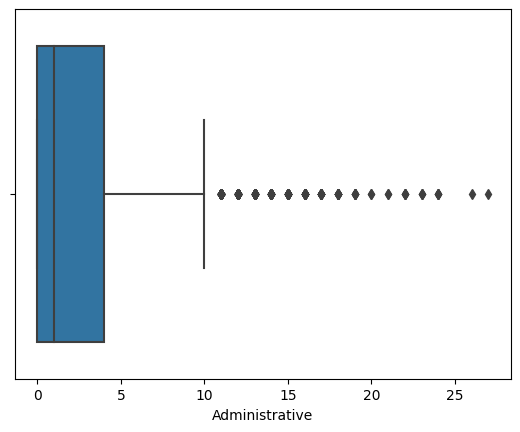

In [235]:

sns.boxplot(x=online_shop_data['Administrative'])

# Calculate IQR
Q1 = online_shop_data['Administrative'].quantile(0.25)
Q3 = online_shop_data['Administrative'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower bound: {lower_bound}\nUpper bound: {upper_bound}')

<Axes: xlabel='Administrative'>

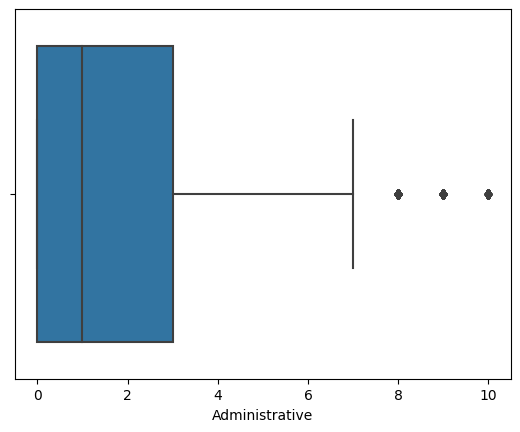

In [236]:
# Remove outliers
online_shop_data = online_shop_data[(online_shop_data['Administrative'] >= lower_bound) & (online_shop_data['Administrative'] <= upper_bound)]
sns.boxplot(x=online_shop_data['Administrative'])


Lower bound: -122.39999999999999
Upper bound: 204.0


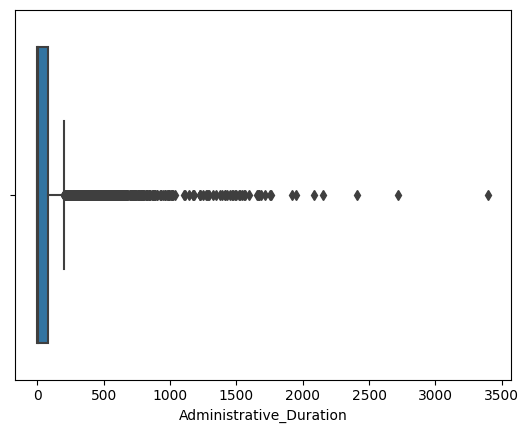

In [237]:
sns.boxplot(x=online_shop_data['Administrative_Duration'])

# Calculate IQR
Q1 = online_shop_data['Administrative_Duration'].quantile(0.25)
Q3 = online_shop_data['Administrative_Duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower bound: {lower_bound}\nUpper bound: {upper_bound}')

<Axes: xlabel='Administrative_Duration'>

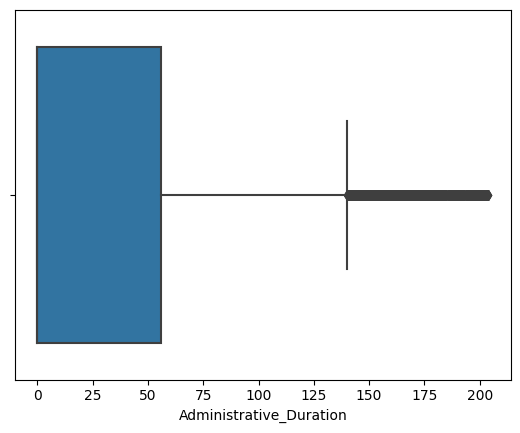

In [238]:
# Remove outliers
online_shop_data = online_shop_data[(online_shop_data['Administrative_Duration'] >= lower_bound) & (online_shop_data['Administrative_Duration'] <= upper_bound)]
sns.boxplot(x=online_shop_data['Administrative_Duration'])

Lower bound: -0.028571428499999996
Upper bound: 0.0476190475


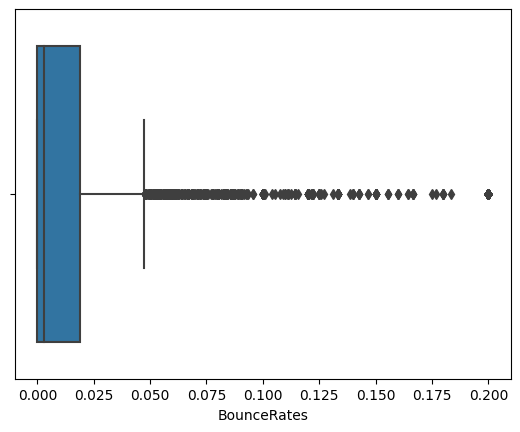

In [239]:
sns.boxplot(x=online_shop_data['BounceRates'])

# Calculate IQR
Q1 = online_shop_data['BounceRates'].quantile(0.25)
Q3 = online_shop_data['BounceRates'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower bound: {lower_bound}\nUpper bound: {upper_bound}')

<Axes: xlabel='BounceRates'>

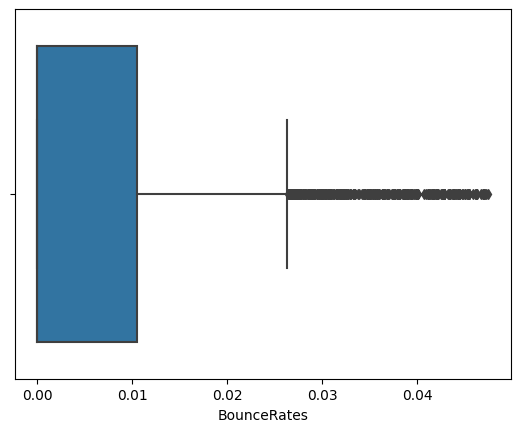

In [240]:
# Remove outliers
online_shop_data = online_shop_data[(online_shop_data['BounceRates'] >= lower_bound) & (online_shop_data['BounceRates'] <= upper_bound)]
sns.boxplot(x=online_shop_data['BounceRates'])

In [241]:
category_counts = online_shop_data['OperatingSystems'].value_counts()

# Display the frequency table
print("Original Frequency Table:")
print(category_counts)



Original Frequency Table:
2    5334
1    1881
3    1697
4     420
8      59
6      14
5       5
7       4
Name: OperatingSystems, dtype: int64


In [242]:
# Determine a threshold
threshold_percentage = 0.40
threshold = len(online_shop_data) * threshold_percentage

# Identify categories with fewer observations than the threshold
infrequent_categories = category_counts[category_counts < threshold].index

# Combine infrequent categories into a new category (e.g., 'Other')
online_shop_data['OperatingSystems'] = online_shop_data['OperatingSystems'].apply(lambda x: 99 if x in infrequent_categories else x)



In [243]:
category_counts = online_shop_data['Region'].value_counts()

# Display the frequency table
print("Original Frequency Table:")
print(category_counts)


Original Frequency Table:
1    3652
3    1808
4     897
2     849
6     629
7     599
9     402
8     334
5     244
Name: Region, dtype: int64


In [244]:
# Determine a threshold
threshold_percentage = 0.10
threshold = len(online_shop_data) * threshold_percentage

# Identify categories with fewer observations than the threshold
infrequent_categories = category_counts[category_counts < threshold].index

# Combine infrequent categories into a new category (e.g., 'Other')
online_shop_data['Region'] = online_shop_data['Region'].apply(lambda x: 99 if x in infrequent_categories else x)


In [245]:

category_counts = online_shop_data['VisitorType'].value_counts()

# Display the frequency table
print("Original Frequency Table:")
print(category_counts)


Original Frequency Table:
Returning_Visitor    7896
New_Visitor          1457
Other                  61
Name: VisitorType, dtype: int64


In [246]:
# Determine a threshold (e.g., 1% of the total number of observations)
threshold_percentage = 0.20
threshold = len(online_shop_data) * threshold_percentage

# Identify categories with fewer observations than the threshold
infrequent_categories = category_counts[category_counts < threshold].index

# Combine infrequent categories into a new category (e.g., 'Other')
online_shop_data['VisitorType'] = online_shop_data['VisitorType'].apply(lambda x: 99 if x in infrequent_categories else 1)


In [247]:
online_shop_data['VisitorType'].value_counts()

1     7896
99    1518
Name: VisitorType, dtype: int64

In [248]:
# Create Dummy Variables for the Month Column
online_shop_data = pd.get_dummies(online_shop_data, columns=['Month'], drop_first=True)

In [249]:
online_shop_data.to_csv('Cleaned_online_shoppers_intention.csv')

In [250]:
online_shop_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,...,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
1,0,0.0,0,0.0,64.000000,0.000000,0.0,0.0,2,2,...,False,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,627.500000,0.020000,0.0,0.0,99,3,...,False,0,1,0,0,0,0,0,0,0
5,0,0.0,0,0.0,154.216667,0.015789,0.0,0.0,2,2,...,False,0,1,0,0,0,0,0,0,0
8,0,0.0,0,0.0,37.000000,0.000000,0.0,0.8,2,2,...,False,0,1,0,0,0,0,0,0,0
9,0,0.0,0,0.0,738.000000,0.000000,0.0,0.4,2,4,...,False,0,1,0,0,0,0,0,0,0


In [251]:
column_headers = online_shop_data.columns.tolist()
column_headers

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated_Duration',
 'BounceRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep']

In [252]:
column_headers = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated_Duration',
 'BounceRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep']

In [253]:
online_shop_data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated_Duration    float64
BounceRates                float64
PageValues                 float64
SpecialDay                 float64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                       bool
Revenue                       bool
Month_Dec                    uint8
Month_Feb                    uint8
Month_Jul                    uint8
Month_June                   uint8
Month_Mar                    uint8
Month_May                    uint8
Month_Nov                    uint8
Month_Oct                    uint8
Month_Sep                    uint8
dtype: object

In [254]:
online_shop_data['OperatingSystems']=online_shop_data['OperatingSystems'].astype('float')
online_shop_data['Region']=online_shop_data['Region'].astype('float')
online_shop_data['VisitorType ']=online_shop_data['VisitorType'].astype('float')

In [255]:
X = pd.DataFrame(online_shop_data, columns=column_headers)
Y = online_shop_data['Revenue']

In [256]:
X.head()
#print(X.columns.tolist())
#Y

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,...,Weekend,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
1,0,0.0,0,0.0,64.000000,0.000000,0.0,0.0,2.0,2,...,False,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,627.500000,0.020000,0.0,0.0,99.0,3,...,True,0,1,0,0,0,0,0,0,0
5,0,0.0,0,0.0,154.216667,0.015789,0.0,0.0,2.0,2,...,False,0,1,0,0,0,0,0,0,0
8,0,0.0,0,0.0,37.000000,0.000000,0.0,0.8,2.0,2,...,False,0,1,0,0,0,0,0,0,0
9,0,0.0,0,0.0,738.000000,0.000000,0.0,0.4,2.0,4,...,False,0,1,0,0,0,0,0,0,0


In [257]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [258]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [259]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [260]:
# Print the results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8858204992033988

Confusion Matrix:
[[1510   42]
 [ 173  158]]

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.97      0.93      1552
        True       0.79      0.48      0.60       331

    accuracy                           0.89      1883
   macro avg       0.84      0.73      0.76      1883
weighted avg       0.88      0.89      0.87      1883



In [261]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [262]:
correlation_results = online_shop_data.corr()[['Revenue']].drop('Revenue')

# Display the correlation results
print("Correlation with", 'Revenue', ":\n", correlation_results)

Correlation with Revenue :
                           Revenue
Administrative           0.095223
Administrative_Duration  0.095725
Informational            0.073104
Informational_Duration   0.041335
ProductRelated_Duration  0.133387
BounceRates             -0.111499
PageValues               0.510538
SpecialDay              -0.073390
OperatingSystems        -0.041692
Browser                  0.021739
Region                  -0.002913
TrafficType              0.002573
VisitorType              0.113125
Weekend                  0.027337
Month_Dec               -0.033181
Month_Feb               -0.047281
Month_Jul                0.002449
Month_June              -0.019740
Month_Mar               -0.069103
Month_May               -0.067842
Month_Nov                0.140738
Month_Oct                0.032074
Month_Sep                0.029042
VisitorType              0.113125


In [263]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import statsmodels.api as sm


# **kNN**

In [264]:
def knn_classification_with_cutoff(X_train, X_test, y_train, y_test, k=5, cutoff_values=None):
    # Create kNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Initialize results dictionary
    results = {}

    # Loop through each cutoff value
    for cutoff in cutoff_values:
        # Predict on the test data
        y_pred_prob = knn_model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_prob > cutoff).astype(int)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Metrics calculation
        val_error = 1 - accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0

        # Store metrics in results dictionary
        results[cutoff] = {'Validation Error': val_error, 'Sensitivity': sensitivity, 'Specificity': specificity}

    # Display results
    for cutoff, metrics in results.items():
        print(f"kNN (k={k}, Cutoff={cutoff}) - Validation Error: {metrics['Validation Error']:.4f}, Sensitivity: {metrics['Sensitivity']:.4f}, Specificity: {metrics['Specificity']:.4f}")

# Example usage:
# Assuming X_train, X_test, y_train, y_test are defined
# You may need to replace these with your actual data
# Also, adjust the value of k and cutoff_values based on your specific dataset
k_value = 5
cutoff_values = [0.5, 0.4, 0.3, 0.2, 0.1]
knn_classification_with_cutoff(X_train, X_test, y_train, y_test, k=k_value, cutoff_values=cutoff_values)


kNN (k=5, Cutoff=0.5) - Validation Error: 0.1636, Sensitivity: 0.2326, Specificity: 0.9652
kNN (k=5, Cutoff=0.4) - Validation Error: 0.1636, Sensitivity: 0.2326, Specificity: 0.9652
kNN (k=5, Cutoff=0.3) - Validation Error: 0.2114, Sensitivity: 0.3776, Specificity: 0.8763
kNN (k=5, Cutoff=0.2) - Validation Error: 0.2114, Sensitivity: 0.3776, Specificity: 0.8763
kNN (k=5, Cutoff=0.1) - Validation Error: 0.3505, Sensitivity: 0.7160, Specificity: 0.6353


# **Logistic Regression**

In [265]:
# Function to fit logistic regression model and calculate metrics
def fit_and_evaluate(X_train, X_test, y_train, y_test, features):
    model = sm.Logit(y_train, sm.add_constant(X_train[features])).fit(disp=False)

    # Predict using the test set
    y_pred_prob = model.predict(sm.add_constant(X_test[features]))
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0
    validation_error = 1 - accuracy

    # Display metrics
    print(f"Features: {features}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Validation Error: {validation_error:.4f}")
    print()

# Forward Logistic Regression
def forward_selection(X_train, X_test, y_train, y_test):
    features = []
    remaining_features = list(X_train.columns)

    for _ in range(len(X_train.columns)):
        best_accuracy = 0
        best_feature = None

        for feature in remaining_features:
            current_features = features + [feature]
            fit_and_evaluate(X_train.astype(float), X_test.astype(float), y_train.astype(float), y_test.astype(float), current_features)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature

        if best_feature is not None:
            features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    print("Forward Logistic Regression - Selected Features:", features)

# Backward Logistic Regression
def backward_elimination(X_train, X_test, y_train, y_test):
    features = list(X_train.columns)

    for _ in range(len(X_train.columns)):
        best_accuracy = 0
        worst_feature = None

        for feature in features:
            current_features = list(set(features) - {feature})
            fit_and_evaluate(X_train.astype(float), X_test.astype(float), y_train.astype(float), y_test.astype(float), current_features)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                worst_feature = feature

        if worst_feature is not None:
            features.remove(worst_feature)
        else:
            break

    print("Backward Logistic Regression - Selected Features:", features)

# Stepwise Logistic Regression
def stepwise_regression(X_train, X_test, y_train, y_test):
    forward_selection(X_train, X_test, y_train, y_test)
    backward_elimination(X_train, X_test, y_train, y_test)

# Perform stepwise logistic regression
stepwise_regression(X_train, X_test, y_train, y_test)

Features: ['Administrative']
Accuracy: 0.8242
Sensitivity (Recall): 0.0000
Specificity: 1.0000
Validation Error: 0.1758

Features: ['Administrative_Duration']
Accuracy: 0.8242
Sensitivity (Recall): 0.0000
Specificity: 1.0000
Validation Error: 0.1758

Features: ['Informational']
Accuracy: 0.8242
Sensitivity (Recall): 0.0000
Specificity: 1.0000
Validation Error: 0.1758

Features: ['Informational_Duration']
Accuracy: 0.8242
Sensitivity (Recall): 0.0000
Specificity: 1.0000
Validation Error: 0.1758

Features: ['ProductRelated_Duration']
Accuracy: 0.8237
Sensitivity (Recall): 0.0091
Specificity: 0.9974
Validation Error: 0.1763

Features: ['BounceRates']
Accuracy: 0.8242
Sensitivity (Recall): 0.0000
Specificity: 1.0000
Validation Error: 0.1758

Features: ['PageValues']
Accuracy: 0.8800
Sensitivity (Recall): 0.4381
Specificity: 0.9742
Validation Error: 0.1200

Features: ['SpecialDay']
Accuracy: 0.8242
Sensitivity (Recall): 0.0000
Specificity: 1.0000
Validation Error: 0.1758

Features: ['Operat